In [1]:
import bainite_boundaries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
data_path = Path(str(bainite_boundaries.PROJECT_ROOT),'bainite_boundaries', 'data', 't90_data.csv')
data_path1=Path(str(bainite_boundaries.PROJECT_ROOT),'bainite_boundaries', 'data', 'MS_qilu.txt')
data_path2=Path(str(bainite_boundaries.PROJECT_ROOT),'bainite_boundaries', 'data', 'MS_RA.csv')
# Read the CSV file
data = pd.read_csv(data_path)
data1 = pd.read_csv(data_path1, sep='\t')
data2 = pd.read_csv(data_path2)

import seaborn as sns
sns.set(style="whitegrid")

In [2]:
data2

,Name,Nr,T,Ms,type
0,S1,MC2-2,400,50,1.0
1,S1,MC2-2,425,50,1.0
2,S1,MC2-2,450,50,1.0
3,S1,MC2-2,475,225,0.0
4,S1,MC2-2,500,350,0.0
5,S1,MC2-2,525,380,0.0
6,S2,MC2-3,375,50,1.0
7,S2,MC2-3,400,50,1.0
8,S2,MC2-3,425,50,1.0
9,S2,MC2-3,450,205,0.0


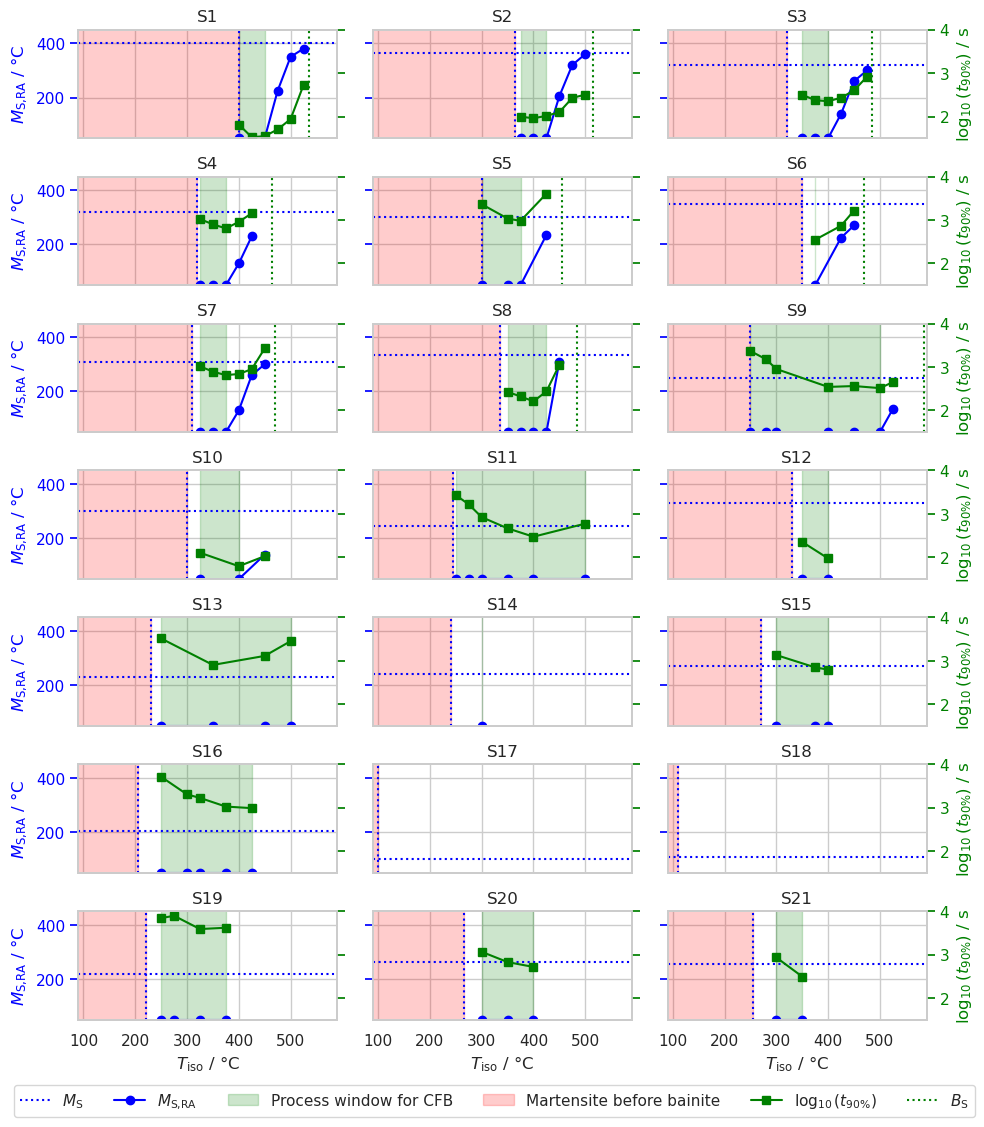

In [8]:
fig,ax=plt.subplots(7,3,figsize=(10,11))
ax=ax.flatten()
for k in range(1,22):
    ax2 = ax[k-1].twinx()
    L=data['Source']=='S'+str(k)
    t90=np.log10(data['t90'][L])
    #t90=data['t90'][L]
    T=data['T'][L]
    ax2.plot(T,t90,'s-',color='green',label='$\log(t_{\text{90%}})$ / s')
    ax[k-1].grid(True)
    L1=data1['Source']=='S'+str(k)
    if np.sum(L1)>0:
        ax[k-1].axhline(data1['Ms (K)'][L1].to_numpy()-273,linestyle=':',color='blue',label=r'$M_\text{S}$')
        ax[k-1].axvline(data1['Ms (K)'][L1].to_numpy()-273,linestyle=':',color='blue')

    
    ax2.set_ylim([1.5,4])
    ax[k-1].set_xlim([90,590])
    ax[k-1].set_title('S'+str(k))
    ax[k-1].tick_params(axis='y', labelcolor='blue')

    L=data2['Name']=='S'+str(k)
    T1=data2['T'][L].to_numpy()
    Ms=data2['Ms'][L].to_numpy()
    MsRA=np.zeros_like(T)+50
    nn=0

    for j in range(np.size(T1)):
        if T1[j] in T.to_numpy():
            LLL=T.to_numpy()==T1[j]
            MsRA[LLL]=Ms[j]
    

    if k <10:
        Bs=[535,515,485,465,455,470,470,485,585]
        ax[k-1].axvline(Bs[k-1],linestyle=':',color='green',label=r'$B_\text{S}$')


    ax[k-1].plot(T,MsRA,color='blue',marker='o',label=r'$M_\text{S,RA}$')
    ax[k-1].set_ylim([50,450])
    ax2.tick_params(axis='y', labelcolor='green')
    ax[k-1].tick_params(axis='y', color='blue')
    ax2.tick_params(axis='y', color='green')
    if k < 19:
        ax[k-1].tick_params(axis='x', labelbottom=False) 
        #ax[k-1].set_xticks([100,200,300,400,500])
    else:
        ax[k-1].set_xlabel(r'$T_{\text{iso}}$ / °C')

    if np.mod(k,3)!=1:
        ax[k-1].tick_params(axis='y', labelleft=False) 
    else:
        ax[k-1].set_ylabel(r'$M_{\text{S,RA}}$ / °C',color='blue')
    
    if np.mod(k,3)!=0:
        ax2.tick_params(axis='y', labelright=False) 
    else:
        ax2.set_ylabel(r'$\log_{10}(t_{\text{90%}})$ / s',color='green')

    L3=MsRA==50
    ax[k-1].fill_between(T[L3],np.zeros_like(T[L3])+50,np.zeros_like(T[L3])+500,zorder=1,color='green',alpha=0.2,label='Process window for CFB')
    ax[k-1].fill_between([50,data1['Ms (K)'][L1].to_numpy()[0]-273],np.zeros(2)+50,np.zeros(2)+500,zorder=1,color='red',alpha=0.2,label='Martensite before bainite')
    ax2.grid(False)

    ax[k-1].plot([],[],'-s',color='green',label=r'$\log_{10}(t_{\text{90%}})$')
    ax[k-1].plot([],[],':',color='green',label=r'$B_\text{S}$')

fig.tight_layout()    
fig.tight_layout()  
ax[k-1].legend(ncol=6, loc='upper center', bbox_to_anchor=(-0.67, -0.53))
fig.savefig(f'ex_results.png', bbox_inches='tight', dpi=300)

In [4]:
[50,data1['Ms (K)'][L1].to_numpy()-273]

[50, array([255])]

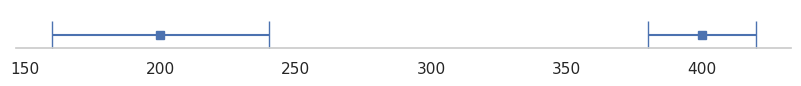

In [5]:
fig, ax = plt.subplots(figsize=(10,0.5))
plt.errorbar([400,200],[1,1],xerr=[20,40],linestyle='none',capsize=10,marker='s')
plt.grid(False)
plt.yticks([])
plt.ylim([0.95,1.1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('explanation_tol.png', bbox_inches='tight', dpi=300)


Text(0.95, 0, '')

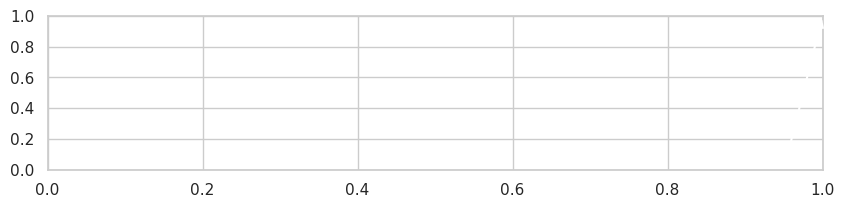

In [6]:
fig, ax = plt.subplots(figsize=(10,2))
ax.annotate('', xy=(1, 1), xycoords='axes fraction', xytext=(0.95, 0),
            arrowprops=dict(arrowstyle="->", lw=1.5))